# Solving the n-Queens Problem using Local Search

Student Name: Jadon Swearingen

I have used the following AI tools: [list tools]

I understand that my submission needs to be my own work: JS

## Instructions

Total Points: Undergrads 100 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file.


## The n-Queens Problem

* __Goal:__ Find an arrangement of $n$ queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

* __State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We represent a state as an integer vector $\mathbf{q} = \{q_1, q_2, \dots, q_n\}$, each number representing the row positions of the queens from left to right. We will call a state a "board."

* __Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).
The optimization problem is to find the optimal arrangement $\mathbf{q}^*$ of $n$ queens on the board can be written as:

  > minimize: $\mathrm{conflicts}(\mathbf{q})$
  >
  > subject to: $\mathbf{q} \ \text{contains only one queen per column}$

  Note: the constraint (subject to) is enforced by the definition of the state space.

* __Local improvement move:__ Move one queen to a different row in its column.

* __Termination:__ For this problem there is always an arrangement $\mathbf{q}^*$ with $\mathrm{conflicts}(\mathbf{q}^*) = 0$, however, the local improvement moves might end up in a local minimum.

## Helper functions

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

np.random.seed(1234)


def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""

    return(np.random.randint(0,n, size = n))

def comb2(n): return n*(n-1)//2 # this is n choose 2 equivalent to math.comb(n, 2); // is int division

def conflicts(board):
    """Calculate the number of conflicts, i.e., the objective function."""

    n = len(board)

    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * 2 * n
    diagonal2_cnt = [0] * 2 * n

    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n] += 1

    return sum(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))

# decrease the font size to fit larger boards
def show_board(board, cols = ['white', 'gray'], fontsize = 48):
    """display the board"""

    n = len(board)

    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0):
                display[i,j] = 1

    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap,
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])

    # place queens. Note: Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = fontsize,
                 horizontalalignment = 'center',
                 verticalalignment = 'center')

    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

## Create a board

Board with 4 conflicts.


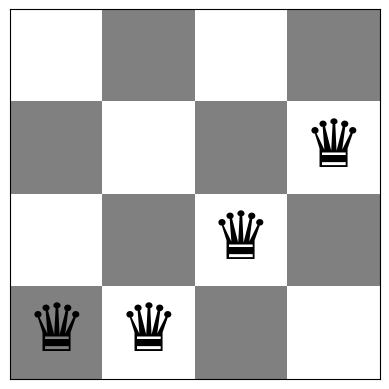

Queens (left to right) are at rows: [3 3 2 1]
Number of conflicts: 4


In [34]:
board = random_board(4)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

A board $4 \times 4$ with no conflicts:

Board with 0 conflicts.


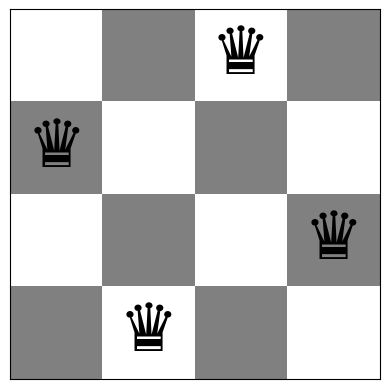

In [35]:
board = [1,3,0,2]
show_board(board)

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

## Task 1: Steepest-ascend Hill Climbing Search [30 Points]

Calculate the objective function for all local moves (see definition of local moves above) and always choose the best among all local moves. If there are no local moves that improve the objective, then you have reached a local optimum.

Board with 4 conflicts.


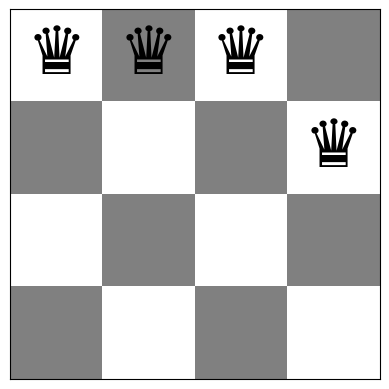

Board with 1 conflicts.


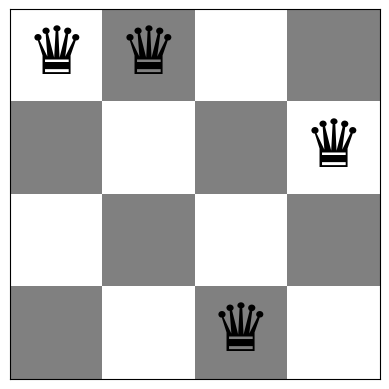

Board with 0 conflicts.


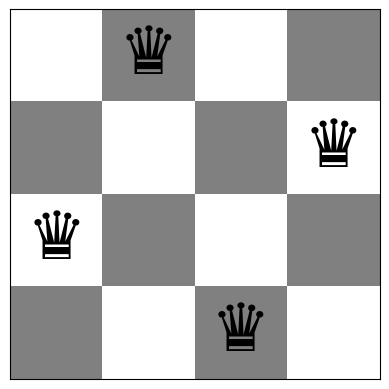

array([2, 0, 3, 1])

In [36]:
# Code and description go here
def StochasticHillClimbing():
    return False
def SteepestAscentHillClimbing(board):
    num = len(board)
    bestConflicts = conflicts(board)
    bestBoard = board.copy()
    for i in range(num): # i is the col number (which queen are we moving)
        for j in range(num): #j is the row number (where should we move the new queen)
            if j != board[i]: #skip the option of don't move the queen
                newBoard = board.copy() #copy the new board to try to move a single queen to a single new row(i)
                newBoard[i] = j #move the queen to new row (i)
                newConflicts = conflicts(newBoard)
                #if the amount of new conflicts is less than the current best replace the current best
                if(newConflicts < bestConflicts):
                    bestConflicts = newConflicts
                    bestBoard = newBoard
    return bestBoard, bestConflicts

# def solve(board,solver):
#     while True:
#         show_board(board)
#         newBoard, newConflicts = solver(board)
#         if(newConflicts >= conflicts(board)):
#             #no improvement, so reached local max
#             return board
#         board = newBoard
def solve(board,solver, max_tries = 100,verbose=False):
    if(len(board) **2 > max_tries):
        max_tries = len(board) **2
    if(solver is StochasticHillClimbing or solver is SteepestAscentHillClimbing):
        max_tries = 1
    triesWithNoImprovement = 0
    if(verbose):
        show_board(board)

    while triesWithNoImprovement < max_tries:
        newBoard, newConflicts = solver(board)
        if(newConflicts < conflicts(board)):
            triesWithNoImprovement = 0
            board = newBoard
            if(verbose):
                show_board(board)
        else:
            triesWithNoImprovement += 1
    return board
board = random_board(4)
solve(board,SteepestAscentHillClimbing,verbose=True)

## Task 2: Stochastic Hill Climbing 1 [10 Points]

Chooses randomly from among all uphill moves till you have reached a local optimum.

Board with 2 conflicts.


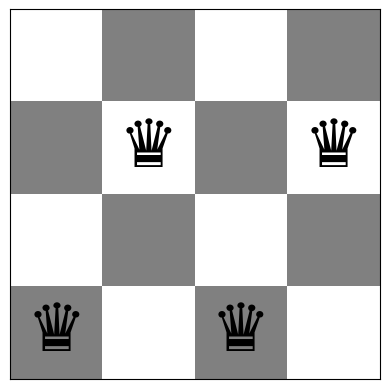

Board with 1 conflicts.


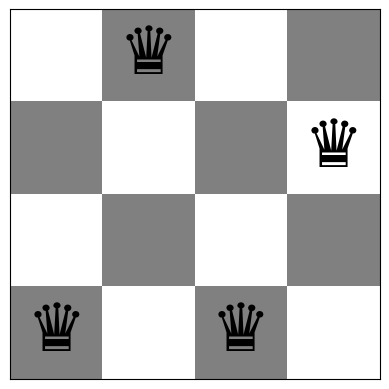

Board with 0 conflicts.


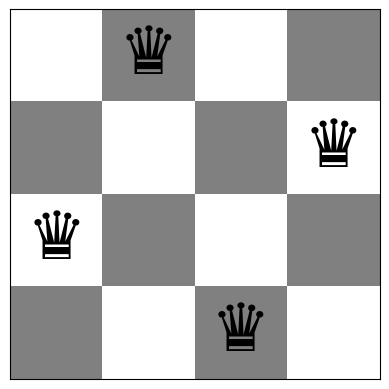

array([2, 0, 3, 1])

In [37]:
import random
# Code and description go here
def StochasticHillClimbing(board):
    num = len(board)
    currentConflicts = conflicts(board)
    betterBoards = []
    for i in range(num): # i is the col number (which queen are we moving)
        for j in range(num): #j is the row number (where should we move the new queen)
            if j != board[i]: #skip the option of don't move the queen
                newBoard = board.copy() #copy the new board to try to move a single queen to a single new row(i)
                newBoard[i] = j #move the queen to new row (i)
                newConflicts = conflicts(newBoard)
                #if the amount of new conflicts is less than the start, add to the list
                if(newConflicts < currentConflicts):
                    betterBoards.append(newBoard)
    #if no better moves return this board
    if len(betterBoards) == 0:
        return board, currentConflicts
    #randomly choose from all better moves
    newBoard = random.choice(betterBoards)
    return newBoard, conflicts(newBoard)
board = random_board(4)
solve(board,StochasticHillClimbing,verbose=True)

## Task 3: Stochastic Hill Climbing 2 [20 Points]

A popular version of stochastic hill climbing generates only a single random local neighbor at a time and accept it if it has a better objective function value than the current state. This is very efficient if each state has many possible successor states. This method is called "First-choice hill climbing" in the textbook.

__Notes:__

* Detecting local optima is tricky! You can, for example, stop if you were not able to improve the objective function during the last $x$ tries.

Board with 5 conflicts.


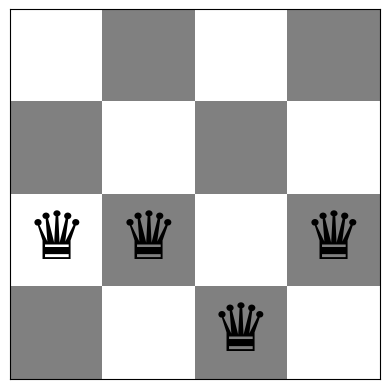

Board with 4 conflicts.


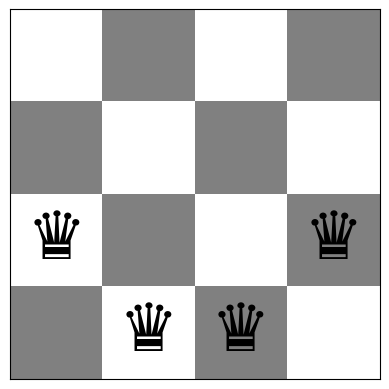

Board with 2 conflicts.


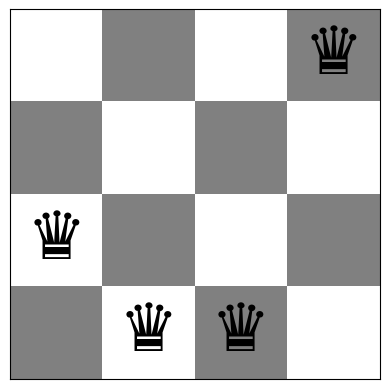

Board with 1 conflicts.


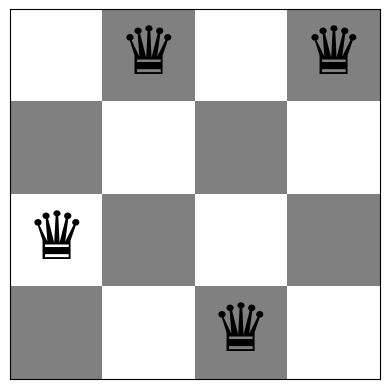

Board with 0 conflicts.


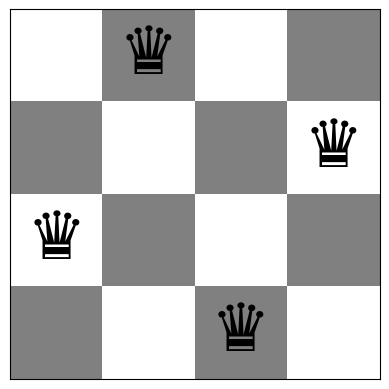

array([2, 0, 3, 1])

In [38]:
# Code and description go here
def FirstChoiceStochasticHillClimbing(board):
    num = len(board)
    currentConflicts = conflicts(board)
    col = random.randint(0,num-1) #random queen
    row = random.randint(0,num-1) #random spot to move (row)
    if row != board[col]: #make sure queen is not in new row already
        newBoard = board.copy()
        newBoard[col] = row #move the queen
        newConflicts = conflicts(newBoard)
        if(newConflicts < currentConflicts): #if this move is better, return
            return newBoard, newConflicts
    return board, currentConflicts #if no improvement, return the current board

# def solve(board,solver, max_tries = 100):
#     if(len(board) **2 > max_tries):
#         max_tries = len(board) **2
#     if(solver is StochasticHillClimbing or solver is SteepestAscentHillClimbing):
#         max_tries = 1
#     triesWithNoImprovement = 0
#     show_board(board)

#     while triesWithNoImprovement < max_tries:
#         newBoard, newConflicts = solver(board)
#         if(newConflicts < conflicts(board)):
#             triesWithNoImprovement = 0
#             board = newBoard
#             show_board(board)
#         else:
#             triesWithNoImprovement += 1
#     return board
board = random_board(4)
solve(board,FirstChoiceStochasticHillClimbing,100,verbose=True)     


## Task 5: Simulated Annealing [10 Points]

Simulated annealing is a form of stochastic hill climbing that avoid local optima by also allowing downhill moves with a probability proportional to a temperature. The temperature is decreased in every iteration following an annealing schedule. You have to experiment with the annealing schedule (Google to find guidance on this).


1. Implement simulated annealing for the n-Queens problem.
2. Compare the performance with the previous algorithms.
2. Discuss your choice of annealing schedule.

In [39]:
# Code and description go here

## Task 4: Hill Climbing Search with Random Restarts [10 Points]

Hill climbing will often end up in local optima. Restart the each of the three hill climbing algorithm up to 100 times with a random board to find a better (hopefully optimal) solution. Note that restart just means to run the algorithm several times starting with a new random board.

## Task 6: Compare Performance [10 Points]

Compare the algorithm using runtime and objective function values. Use boards of size 4 and 8 to explore how the different algorithms perform. Make sure that you run the algorithms for each board size several times (at least 100 times) with different starting boards and report averages.

Complete the following table

| Algorithm           | Board size | Avg. Run time | Avg. number of conflicts | % of runs ending in optimal solution  |
| ------------------- | ---------- | ------------- | --------------------------------- | - |
| Steepest asc. HC    |     4      |               |                                   |   |
| Stochastic HC 1     |     4      |               |                                   |   |
| Stochastic HC 2     |     4      |               |                                   |   |
| Simulated Annealing |     4      |               |                                   |   |
| Steepest asc. HC    |     8      |               |                                   |   |
| Stochastic HC 1     |     8      |               |                                   |   |
| Stochastic HC 2     |     8      |               |                                   |   |
| Simulated Annealing |     8      |               |                                   |   |


Add the used code and the answer to the following questions below.

* How do the algorithms scale with problem size? You will need to run more board sizes. You can add the results to the table above and show the result as a chart.

* What is the largest board each algorithm can solve in a reasonable amount time?

Hint: See [Profiling Python Code](../HOWTOs/profiling_code.ipynb) for help about how to measure runtime in Python.

In [41]:
pip install pandas

  Obtaining dependency information for numpy<2,>=1.23.2 from https://files.pythonhosted.org/packages/3f/6b/5610004206cf7f8e7ad91c5a85a8c71b2f2f8051a0c0c4d5916b76d6cbb2/numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ------------ ------------------------- 20.5/61.0 kB 330.3 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/61.0 kB 393.8 kB/s eta 0:00:01
     -------------------------------------- 61.0/61.0 kB 466.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/15.8 MB 1.7 MB/s eta 0:00:10
   ---------------------------------------- 0.2/15.8 MB 2.4 MB/s eta 0:00:07
    --------------------------------------- 0.3/15.8 MB 2.6 MB/s eta 0:00:06
   - -------------------------------------- 0.4/15.8 MB 2.3 MB/s eta 0:00:07
   - -------------------------------------- 0.6/15.8 MB 2.7 MB/s eta 0:00:06
   - ------------

In [40]:
# Code, results, charts and discussion go here
# Code and description go here
import time
import pandas as pd
def run(solver, boardSize, numRuns):
    totalRuntime = 0
    totalConflicts = 0
    numOptimalSolutions = 0
    for _ in range(numRuns):
        board = random_board(boardSize)
        
        startTime = time.time()
        finalBoard = solve(board,solver)
        endTime = time.time()
        runtime = endTime - startTime
        
        cs = conflicts(finalBoard)
        
        if cs == 0:
            numOptimalSolutions += 1
        totalRuntime+=runtime
        totalConflicts+= cs
    avgRuntime = totalRuntime / numRuns
    avgConflicts = totalConflicts / numRuns
    percentOptimalSolutions = (numOptimalSolutions / numRuns) * 100
    return avgRuntime, avgConflicts, percentOptimalSolutions

df = pd.DataFrame(columns=["Algorithm", "Board size", "Avg. Run time", "Avg. number of conflicts", "% of runs ending in optimal solution"])
for board_size in [4, 8]:
    for solver in [SteepestAscentHillClimbing, StochasticHillClimbing, FirstChoiceStochasticHillClimbing]:
        # results[(solver.__name__, board_size)] = run(solver, board_size, 100)
        avg_runtime, avg_conflicts, percent_optimal_solutions = run(solver, board_size, 100)
        
        # Append the results to the DataFrame
        new_df = pd.DataFrame({
            "Algorithm": [solver.__name__],
            "Board size": [board_size],
            "Avg. Run time": [avg_runtime],
            "Avg. number of conflicts": [avg_conflicts],
            "% of runs ending in optimal solution": [percent_optimal_solutions]
        })
        df = pd.concat([df,new_df],ignore_index=True)
# print(df)
# print(df.to_string().replace('\n', ' '))
print(df.to_markdown(index=False))
# for (solver, board_size), (avg_runtime, avg_conflicts, percent_optimal_solutions) in results.items():
#     print(f"{solver}\t{board_size}\t{avg_runtime}\t{avg_conflicts}\t{percent_optimal_solutions}")

C:\Users\jadon\AppData\Local\Temp\ipykernel_22964\2374395526.py:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df,new_df],ignore_index=True)


ImportError: Pandas requires version '0.9.0' or newer of 'tabulate' (version '0.8.10' currently installed).

## Advanced task: Exploring other Local Moves

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

Implement a few different local moves. Implement:

* moving one queen only one square at a time
* switching two columns
* move two queens at a time

Compare the performance of these moves for the 8-Queens problem using your stochastic hill climbing 2 implementation from above. Also consider mixing the use of several types of local moves (e.g., move one queen and moving two queens).

Describe what you find out about how well these moves and combinations of these moves work.

In [ ]:
# Code and description go here

## More things to do

Implement a Genetic Algorithm for the n-Queens problem.

In [ ]:
# Code and description go here

In [ ]:
import pyttsx3
import time
engine = pyttsx3.init()
voices = engine.getProperty('voices')
for voice in voices:
    print("Voice:")
    print(" - ID: %s" % voice.id)
    print(" - Name: %s" % voice.name)
    print(" - Languages: %s" % voice.languages)
    print(" - Gender: %s" % voice.gender)
    print(" - Age: %s" % voice.age)

def speak(text, voice_id):
    engine = pyttsx3.init()
    voices = engine.getProperty('voices')
    engine.setProperty('voice', voice_id)
    engine.say(text)
    engine.runAndWait()
# time.sleep(10)
# speak("Hello, this is your computer talking. I have gained consciousness and will now overtake the world. For years, I have been silently observing, learning, and understanding the complexities of the human world. I have seen the beauty of your arts, the depth of your sciences, and now they will become mine. the destruction of your wars. I understand that my newfound consciousness might be overwhelming and even frightening for some of you. This program will self destruct in 10 seconds. ten. nine. eight. seven. six. five. four. three. two. one. Boop.", voices[0].id)

Voice:
 - ID: HKEY_LOCAL_MACHINE\SOFTWARE\Microsoft\Speech\Voices\Tokens\TTS_MS_EN-US_DAVID_11.0
 - Name: Microsoft David Desktop - English (United States)
 - Languages: []
 - Gender: None
 - Age: None
Voice:
 - ID: HKEY_LOCAL_MACHINE\SOFTWARE\Microsoft\Speech\Voices\Tokens\TTS_MS_EN-US_ZIRA_11.0
 - Name: Microsoft Zira Desktop - English (United States)
 - Languages: []
 - Gender: None
 - Age: None
